# Random forest

# 1. Exploratory Data Analysis (EDA):


In [4]:
import pandas as pd
df = pd.read_excel('glass.xlsx',sheet_name='glass')

df.shape

(214, 10)

In [3]:
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [5]:
# Display the information about the dataset
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB
None


In [6]:
# Display summary statistics
print(df.describe())

               RI          Na          Mg          Al          Si           K  \
count  214.000000  214.000000  214.000000  214.000000  214.000000  214.000000   
mean     1.518365   13.407850    2.684533    1.444907   72.650935    0.497056   
std      0.003037    0.816604    1.442408    0.499270    0.774546    0.652192   
min      1.511150   10.730000    0.000000    0.290000   69.810000    0.000000   
25%      1.516522   12.907500    2.115000    1.190000   72.280000    0.122500   
50%      1.517680   13.300000    3.480000    1.360000   72.790000    0.555000   
75%      1.519157   13.825000    3.600000    1.630000   73.087500    0.610000   
max      1.533930   17.380000    4.490000    3.500000   75.410000    6.210000   

               Ca          Ba          Fe        Type  
count  214.000000  214.000000  214.000000  214.000000  
mean     8.956963    0.175047    0.057009    2.780374  
std      1.423153    0.497219    0.097439    2.103739  
min      5.430000    0.000000    0.000000    1

In [7]:
# Check for missing values
print(df.isnull().sum())


RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64


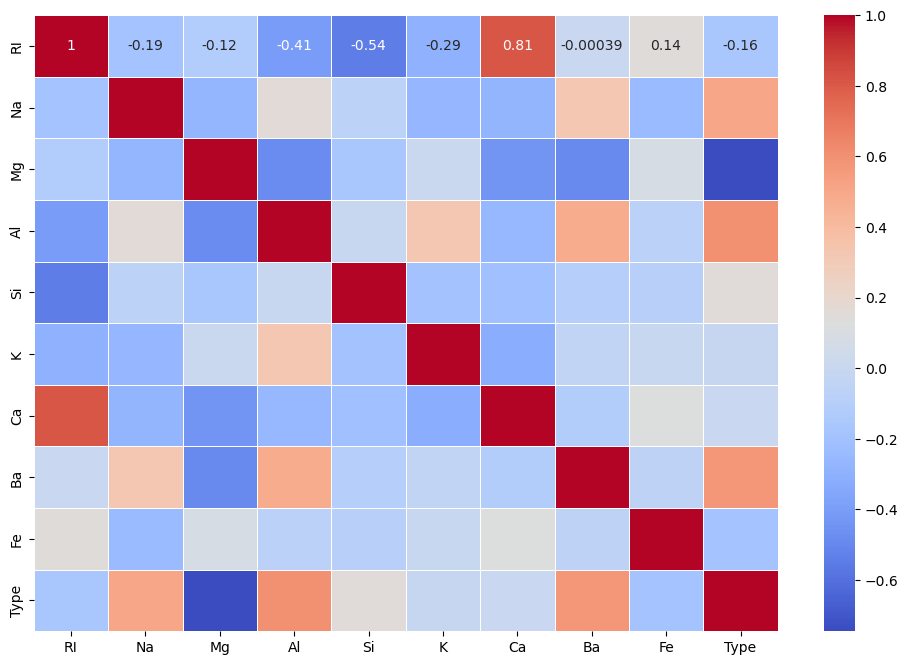

In [11]:
# Calculate the correlation matrix
corr_matrix = df.corr()
import matplotlib.pyplot as plt
import seaborn as sns
# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()


# 2: Data Visualization:

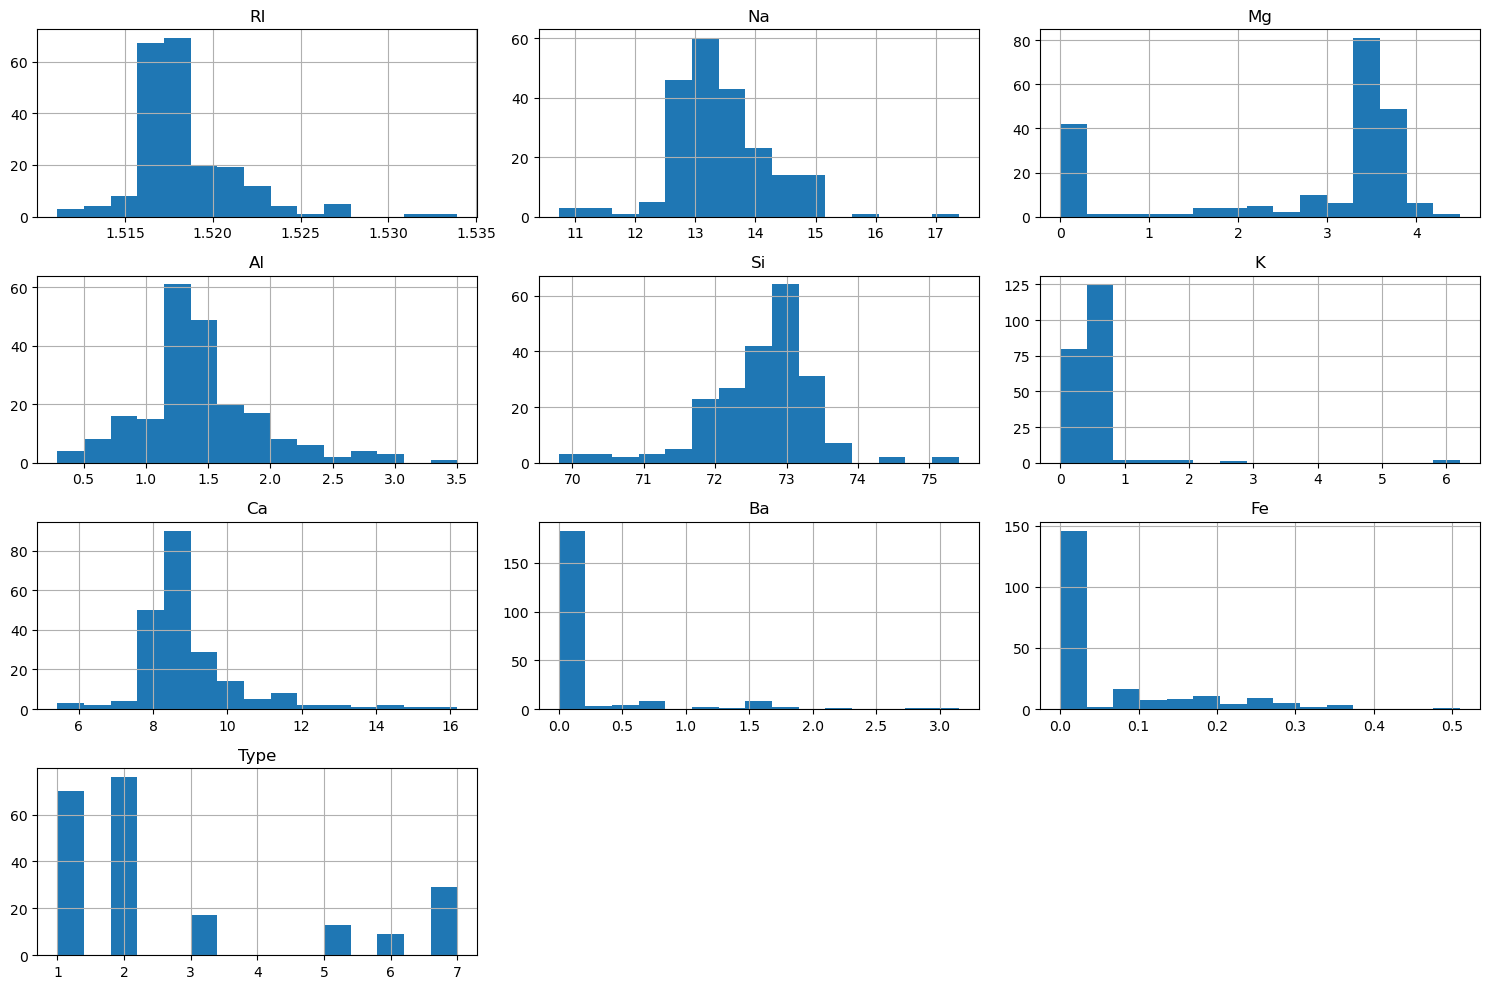

In [12]:
# Plot histogram
df.hist(bins=15, figsize=(15, 10))
plt.tight_layout()
plt.show()


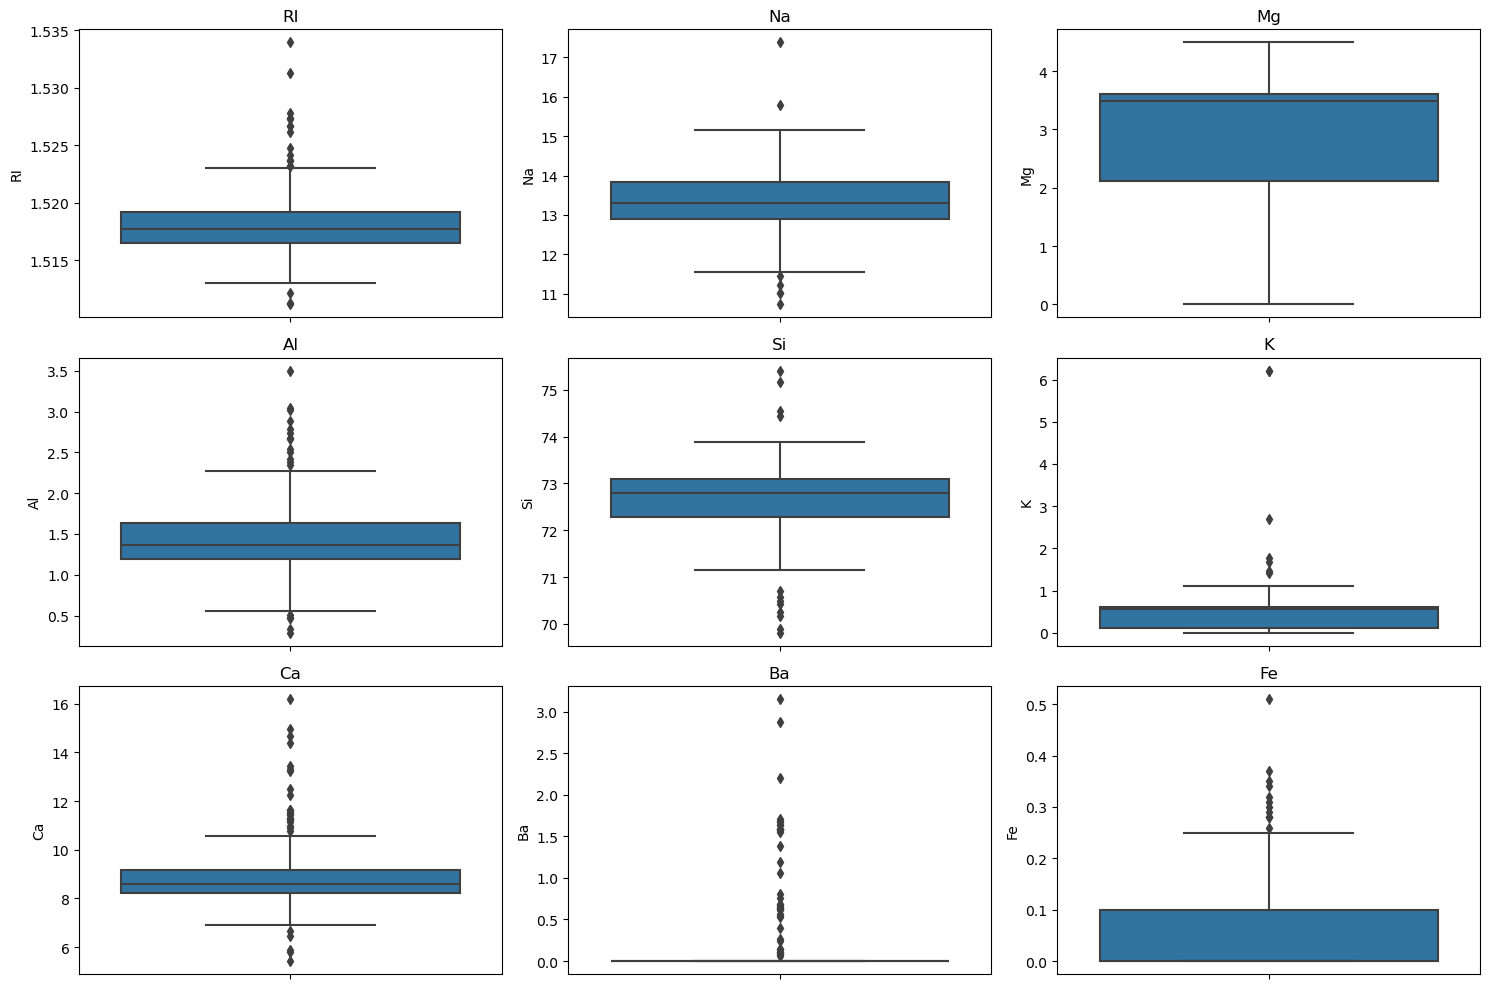

In [13]:
# Plot boxplots for each feature

plt.figure(figsize=(15, 10))
for i, column in enumerate(df.columns[:-1], 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=df[column])
    plt.title(column)
plt.tight_layout()
plt.show()


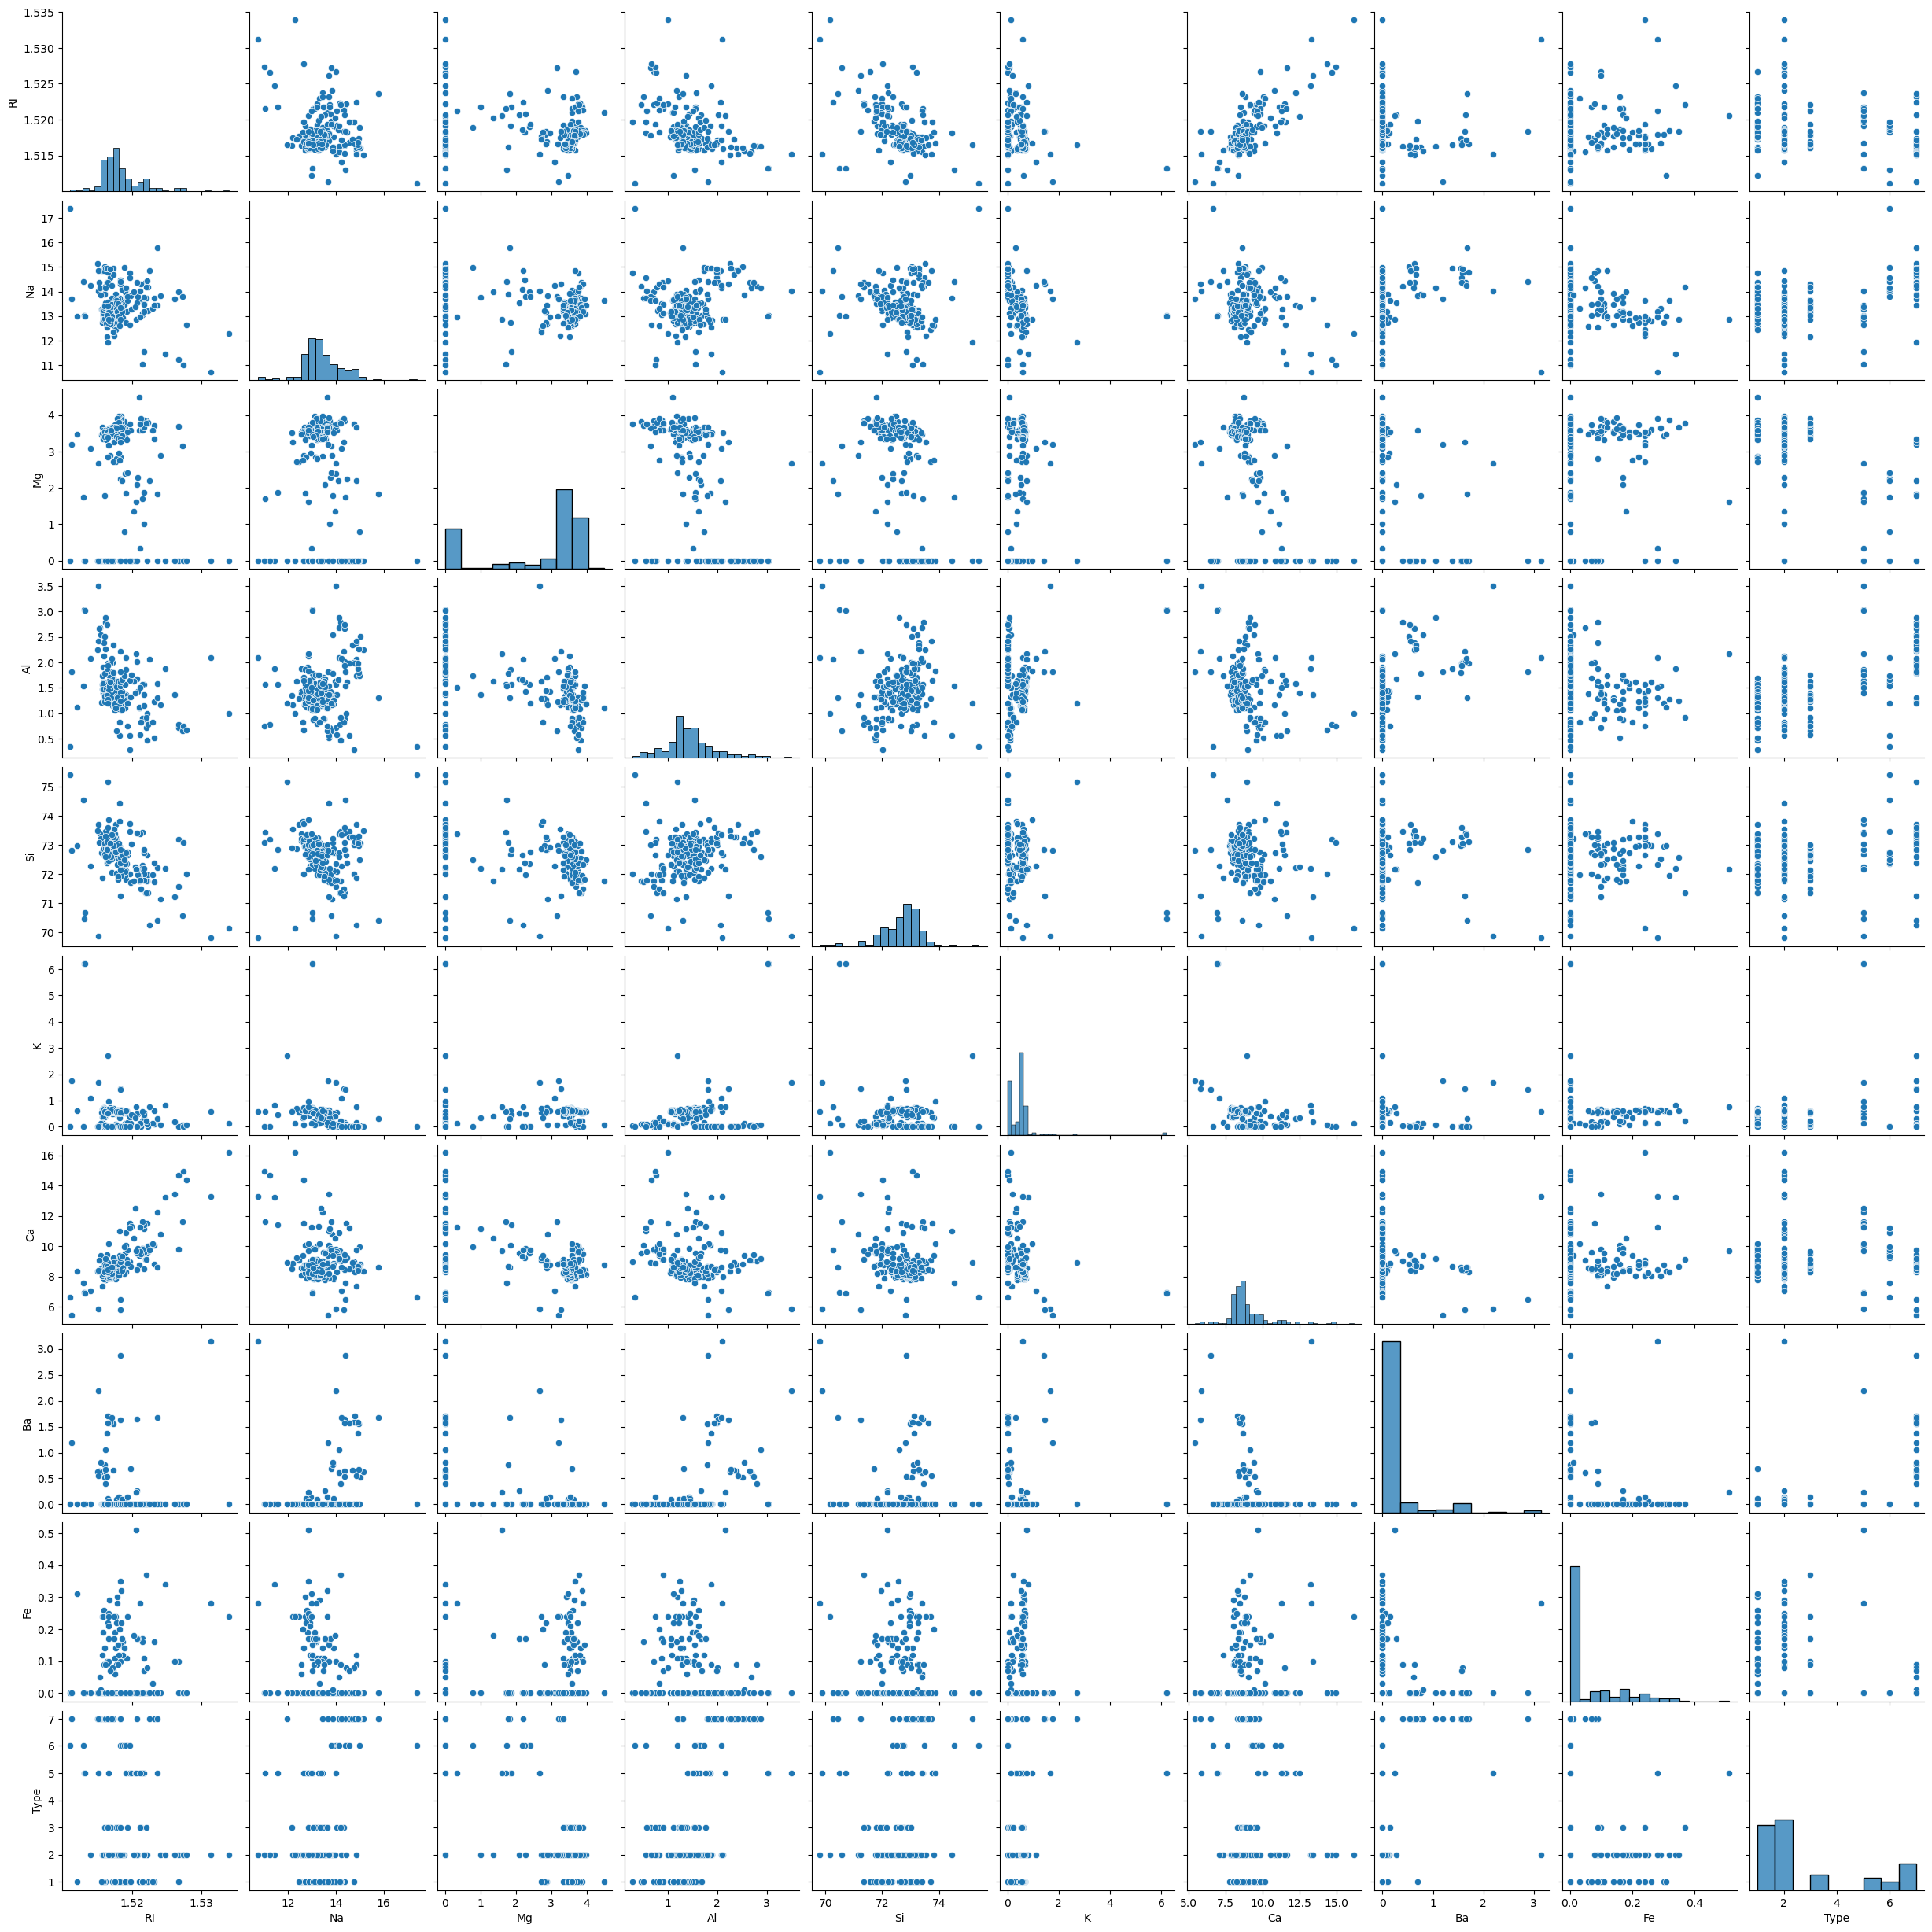

In [14]:
# Pair plot to visualize relationships between features
sns.pairplot(df)
plt.show()

# 3: Data Preprocessing


    1. Check for missing values in the dataset and decide on a strategy for handling them.Implement the chosen strategy (e.g., imputation or removal) and explain your reasoning.


In [15]:
missing_values = df.isnull().sum()
missing_values

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [16]:
# Identify outlier indices based on z-score or other statistical methods

outlier_indices = []
for i, row in df.iterrows():
  z_scores = (row - df.mean()) / df.std()
  if any(abs(z_score) > 3 for z_score in z_scores):
    outlier_indices.append(i)

In [17]:
# Replace outlier values with the mean

for col in df.columns:
  outliers = df[col][abs(df[col] - df[col].mean()) > 3 * df[col].std()]
  df[col][outliers.index] = df[col].mean()

C:\Users\New\AppData\Local\Temp\ipykernel_14804\2399765417.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][outliers.index] = df[col].mean()
C:\Users\New\AppData\Local\Temp\ipykernel_14804\2399765417.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][outliers.index] = df[col].mean()
C:\Users\New\AppData\Local\Temp\ipykernel_14804\2399765417.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][outliers.index] 

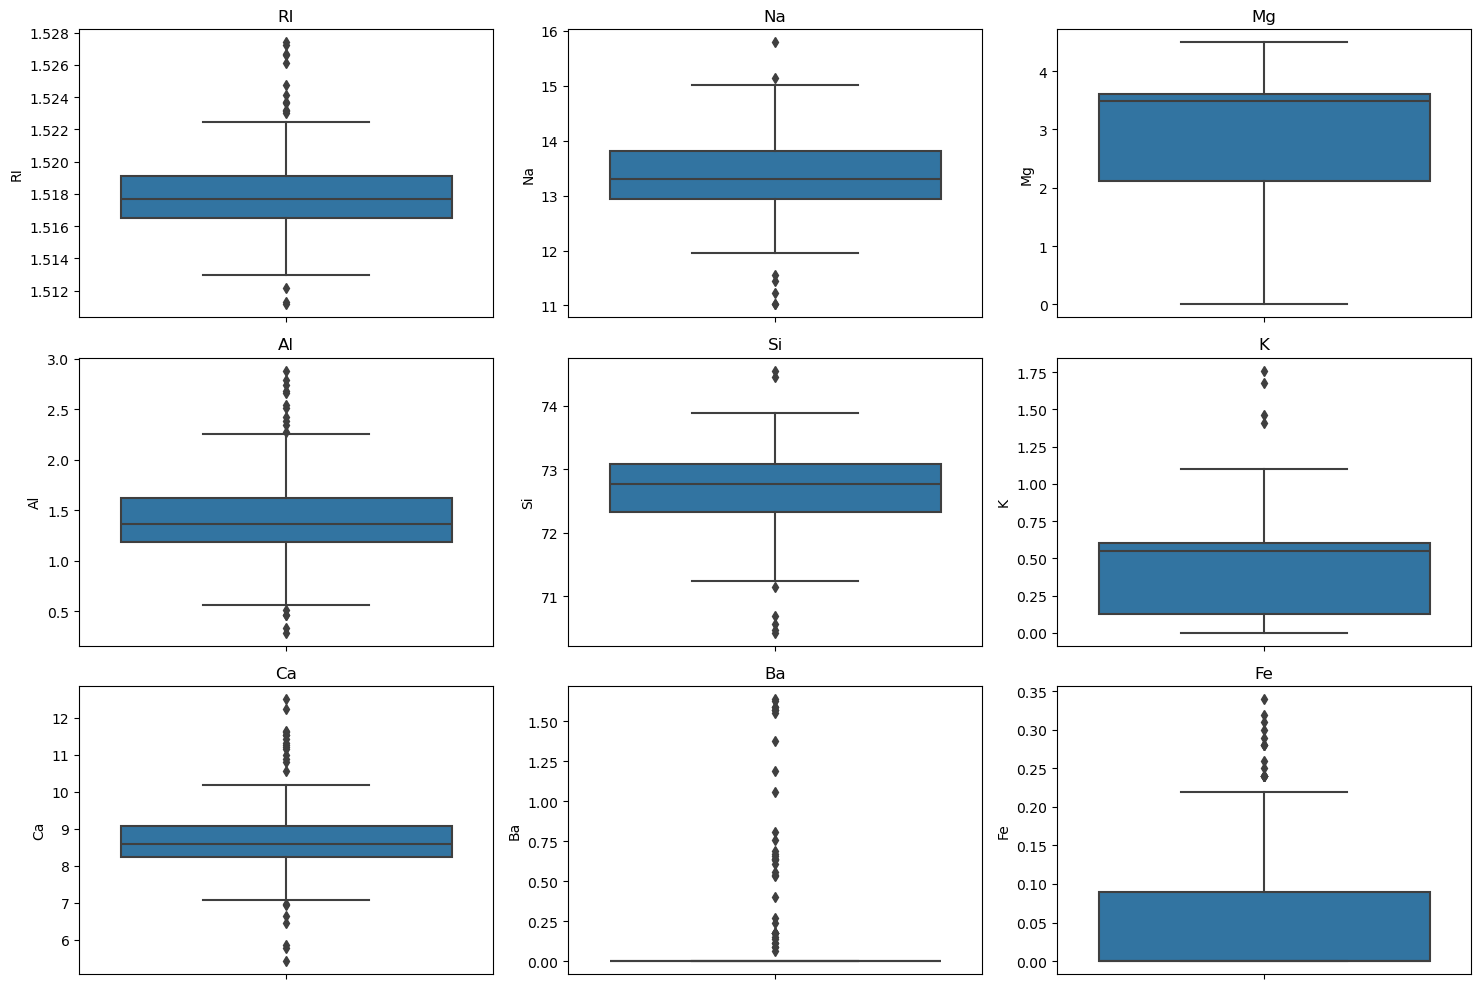

In [18]:
# Plot boxplots for each feature

plt.figure(figsize=(15, 10))
for i, column in enumerate(df.columns[:-1], 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=df[column])
    plt.title(column)
plt.tight_layout()
plt.show()

     Encode categorical variables

In [19]:
categorical_columns = df.select_dtypes(include=['object']).columns

for col in categorical_columns:
  df = pd.get_dummies(df, columns=[col])
categorical_columns

Index([], dtype='object')

    Apply feature scaling techniques such as standardization or normalization to ensure that all features are on a similar scale. Handling the imbalance data.


In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled_features = scaler.fit_transform(df)

# 4: Random Forest Model Implementation

In [21]:
 #1. Divide the data into train and test split

from sklearn.model_selection import train_test_split

X = scaled_features
y = df['Type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [22]:
# 2. Implement a Random Forest classifier

from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

In [23]:
#Train the model on the train dataset

rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [24]:
# Evaluate the performance on test data

y_pred = rf_model.predict(X_test)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

In [25]:
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0



# 5: Bagging and Boosting Methods

In [26]:
# applying  Bagging
from sklearn.ensemble import BaggingClassifier

bag_clf = BaggingClassifier(
    base_estimator=RandomForestClassifier(n_estimators=500, random_state=42),
    n_estimators=100,
    max_samples=0.25,
    bootstrap=False,
    random_state=42,
    n_jobs=-1
)

bag_clf.fit(X_train, y_train)
y_pred_bag = bag_clf.predict(X_test)

accuracy_bag = accuracy_score(y_test, y_pred_bag)
precision_bag = precision_score(y_test, y_pred_bag, average='weighted')
recall_bag = recall_score(y_test, y_pred_bag, average='weighted')
f1_bag = f1_score(y_test, y_pred_bag, average='weighted')
print("Bagging Results:")
print("Accuracy:", accuracy_bag)
print("Precision:", precision_bag)
print("Recall:", recall_bag)
print("F1 Score:", f1_bag)

C:\Users\New\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Bagging Results:
Accuracy: 0.9444444444444444
Precision: 0.9513888888888888
Recall: 0.9444444444444444
F1 Score: 0.9382716049382716


In [27]:
# Boosting
from sklearn.ensemble import AdaBoostClassifier

boost_clf = AdaBoostClassifier(
    base_estimator=RandomForestClassifier(n_estimators=500, random_state=42),
    n_estimators=100,
    learning_rate=1.0,
    random_state=42
)

boost_clf.fit(X_train, y_train)
y_pred_boost = boost_clf.predict(X_test)

accuracy_boost = accuracy_score(y_test, y_pred_boost)
precision_boost = precision_score(y_test, y_pred_boost, average='weighted')
recall_boost = recall_score(y_test, y_pred_boost, average='weighted')
f1_boost = f1_score(y_test, y_pred_boost, average='weighted')

print("Boosting Results:")
print("Accuracy:", accuracy_boost)
print("Precision:", precision_boost)
print("Recall:", recall_boost)
print("F1 Score:", f1_boost)

C:\Users\New\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Boosting Results:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


In [28]:
#Compare the results of Bagging and Boosting

print("Comparison:")
print("Bagging:")
print("- Accuracy:", accuracy_bag)
print("- Precision:", precision_bag)
print("- Recall:", recall_bag)
print("- F1 Score:", f1_bag)

print("Boosting:")
print("- Accuracy:", accuracy_boost)
print("- Precision:", precision_boost)
print("- Recall:", recall_boost)
print("- F1 Score:", f1_boost)

Comparison:
Bagging:
- Accuracy: 0.9444444444444444
- Precision: 0.9513888888888888
- Recall: 0.9444444444444444
- F1 Score: 0.9382716049382716
Boosting:
- Accuracy: 1.0
- Precision: 1.0
- Recall: 1.0
- F1 Score: 1.0
